In [33]:
import numpy as np
import itertools as it 
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [34]:
def create_n_dimensional_meshgrid(n_dimensions, num_points=10, start=0, end=1):
    """
    Create an n-dimensional meshgrid.
    
    Parameters:
    - n_dimensions: int, number of dimensions
    - num_points: int, number of points along each dimension (default: 40)
    - start: float, start value for linspace (default: 0)
    - end: float, end value for linspace (default: 1)
    
    Returns:
    - X_viz: numpy array, shape (num_points**n_dimensions, n_dimensions)
    """
    # Create linspace for each dimension
    x = np.linspace(start, end, num_points)
    
    # Create meshgrid
    X = np.meshgrid(*[x for _ in range(n_dimensions)])
    
    # Stack and reshape the meshgrid
    X_viz = np.column_stack([X[i].ravel() for i in range(n_dimensions)])
    
    return X_viz

# Example usage:
n_dim = 4  # Change this to any number of dimensions
X_viz = create_n_dimensional_meshgrid(n_dim)

print(f"Shape of X_viz: {X_viz.shape}")

Shape of X_viz: (10000, 4)


In [37]:

def create_n_dimensional_meshgrid_v2(initial_coords, buffer, num_points=10):
    """
    Create an n-dimensional meshgrid centered around initial coordinates with a buffer.
    
    Parameters:
    - initial_coords: list or numpy array, initial coordinates
    - buffer: float, buffer around each coordinate
    - num_points: int, number of points along each dimension (default: 10)
    
    Returns:
    - X_viz: numpy array, shape (num_points**n_dimensions, n_dimensions)
    """
    # Ensure initial_coords is a numpy array
    initial_coords = np.array(initial_coords)
    n_dimensions = len(initial_coords)
    
    # Create linspace for each dimension
    X = []
    for coord in initial_coords:
        start = max(0, coord - buffer)  # Ensure non-negative
        end = min(1, coord + buffer)    # Ensure not exceeding 1
        X.append(np.linspace(start, end, num_points))
    
    # Create meshgrid
    meshgrid = np.meshgrid(*X)
    
    # Stack and reshape the meshgrid
    X_viz = np.column_stack([grid.ravel() for grid in meshgrid])
    
    return X_viz

# Example usage:
initial_point = [0.5, 0.3, 0.7, 0.4]  # Example initial point
buffer = 0.2
X_viz = create_n_dimensional_meshgrid_v2(initial_point, buffer)
print(f"Shape of X_viz: {X_viz.shape}")
print(f"Range for each dimension:")
for i in range(len(initial_point)):
    print(f"Dimension {i+1}: {X_viz[:, i].min():.2f} to {X_viz[:, i].max():.2f}")

Shape of X_viz: (10000, 4)
Range for each dimension:
Dimension 1: 0.30 to 0.70
Dimension 2: 0.10 to 0.50
Dimension 3: 0.50 to 0.90
Dimension 4: 0.20 to 0.60


In [39]:
function_num = 1

In [41]:
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

X= (10, 2) , dimensions= 2
x 1 = [0.31940389 0.57432921 0.73102363 0.84035342] ... 
x 2 = [0.76295937 0.8798981  0.73299988 0.26473161] ... 
Y= (10,) = [1.32267704e-079 1.03307824e-046 7.71087511e-016 3.34177101e-124] ...


In [43]:
X

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397]])

In [45]:
y

array([ 1.32267704e-079,  1.03307824e-046,  7.71087511e-016,
        3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
       -2.08909327e-091,  2.53500115e-040,  3.60677119e-081,
        6.22985647e-048])

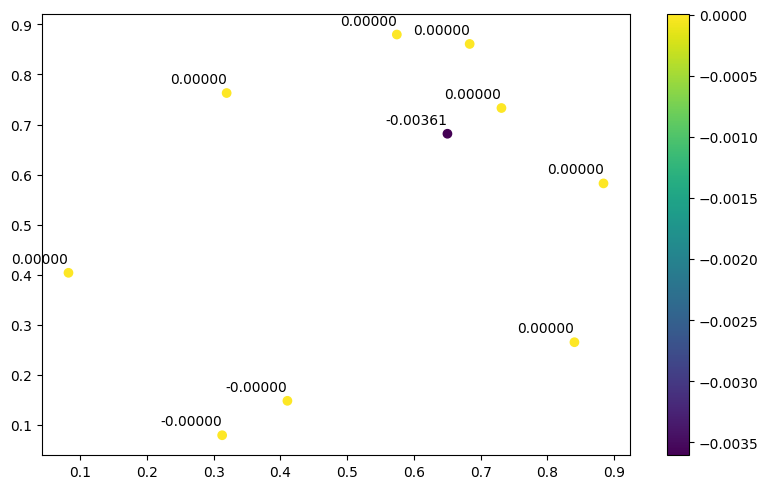

In [47]:
import matplotlib.pyplot as plt

def plot_2d_scatter_with_annotations(X, y, figsize=(8, 5)):
    plt.figure(figsize=figsize)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
    for i, (x, y_val) in enumerate(zip(X, y)):
        plt.annotate(f'{y_val:.5f}', x, xytext=(0, 5), textcoords='offset points', ha='right', va='bottom')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

plot_2d_scatter_with_annotations(X, y)


# Upper Confidence Bound

In [50]:
# Initialize and fit the Gaussian Process Regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF([1, 1], (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=0)
#gpr = GaussianProcessRegressor()
gpr.fit(X, y)


C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1]),
                         n_restarts_optimizer=10, random_state=0)

In [52]:
# Find the index of the maximum value in y
max_index = np.argmax(-y)
max_y = y[max_index]
corresponding_X = X[max_index]

print(f"Maximum value in y: {max_y:.5f}")
print(f"Corresponding X values: {corresponding_X}")
print(f"Index of maximum value: {max_index}")

Maximum value in y: -0.00361
Corresponding X values: [0.65011406 0.68152635]
Index of maximum value: 4


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming gpr, X, y, and corresponding_X are defined earlier in your code

# Create a grid for optimization
x1 = np.linspace(corresponding_X[0]-0.02, corresponding_X[0]+0.02, 100)
x2 = np.linspace(corresponding_X[1]-0.02, corresponding_X[1]+0.02, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Predict mean and standard deviation
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate UCB
#ucb = mean + 1.96 * std
ucb = mean + 0.5 * std
# Find the next query point
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print('Next query UCB: ', next_query)

Next query UCB:  [0.67011406 0.70152635]


Next query UCB:  [0.67011406 0.70152635]


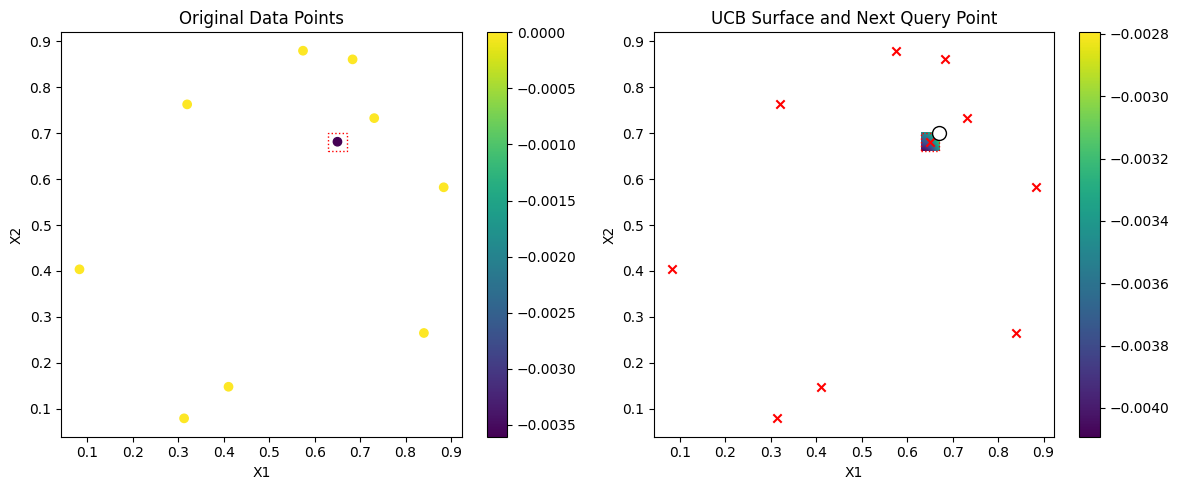

NameError: name 'next_query_UCB' is not defined

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_gp_ucb(X, y, x1, x2, ucb, next_query):
    """
    Visualize Gaussian Process results with UCB.
    
    Parameters:
    X (array): Input data points
    y (array): Output values
    x1 (array): Grid values for first dimension
    x2 (array): Grid values for second dimension
    ucb (array): Upper Confidence Bound values
    next_query (array): Next query point
    """
    plt.figure(figsize=(12, 5))
    
    # Original data points
    plt.subplot(121)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Original Data Points')
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    # Add dotted rectangle for X_grid
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    # UCB surface
    plt.subplot(122)
    ucb_surface = plt.imshow(ucb.reshape(len(x1), len(x2)), 
                             extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
                             origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(ucb_surface)
    
    # Add dotted rectangle for X_grid
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    # Plot original points and next query point
    plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
    plt.scatter(next_query[0], next_query[1], c='white', marker='o', s=100, edgecolor='black')
    
    plt.title('UCB Surface and Next Query Point')
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.tight_layout()
    plt.show()

# Example usage:
print('Next query UCB: ', next_query)
visualize_gp_ucb(X, y, x1, x2, ucb, next_query)


visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB)

## Function 1: conlcusion

Next query UCB:  [0.67011406 0.70152635
with ucb = mean + 0.5 * std    
going for exploitation over exploration


In [59]:
# Append next_query to X
X_updated = np.vstack((X, next_query))
print(X_updated)

[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]
 [0.67011406 0.70152635]]


## Function 2

In [62]:

function_num = 2

In [64]:
function_num = 2
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

X= (10, 2) , dimensions= 2
x 1 = [0.66579958 0.87779099 0.14269907 0.84527543] ... 
x 2 = [0.12396913 0.7786275  0.34900513 0.71112027] ... 
Y= (10,) = [ 0.53899612  0.42058624 -0.06562362  0.29399291] ...


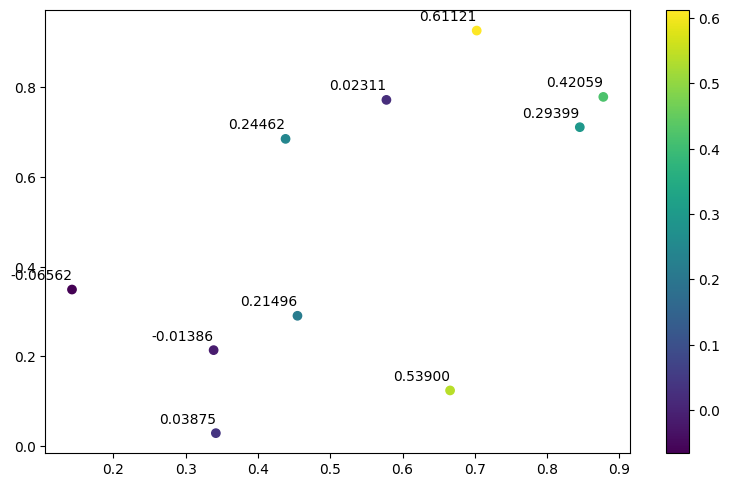

In [66]:
plot_2d_scatter_with_annotations(X, y)

In [68]:

from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
# Gaussian Process Regressor with Matern kernel
kernel = Matern(nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=25)

#gpr = GaussianProcessRegressor()
gpr.fit(X, y)

GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=25)

Gaussian Process Regressor (GPR): We use a GPR with a Matern kernel. This kernel is well-suited for modeling noisy functions.

Expected Improvement (EI) Acquisition Function: This helps balance exploration and exploitation. It guides the search towards areas that are either predicted to be good or have high uncertainty.

## ucb

Next query UCB:  [0.1 1. ]


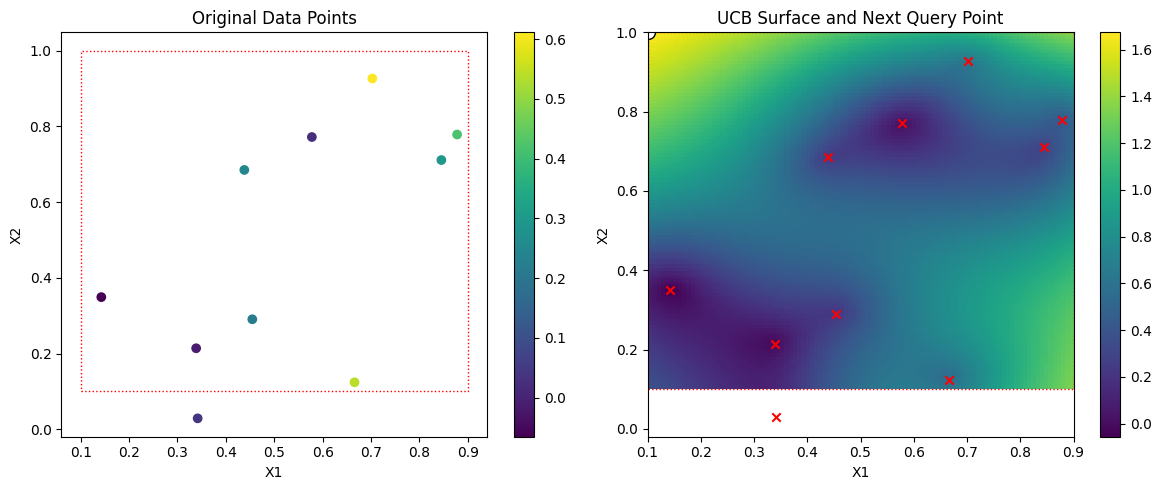

In [73]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming gpr, X, y, and corresponding_X are defined earlier in your code
# Create a grid for optimization
x1 = np.linspace(0.1, 0.9, 100)
x2 = np.linspace(0.1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])
# Predict mean and standard deviation
mean, std = gpr.predict(X_grid, return_std=True)
# Calculate UCB
ucb = mean + 1.96 * std
# Find the next query point
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print('Next query UCB: ', next_query)

visualize_gp_ucb(X, y, x1, x2, ucb, next_query)

## EI , PI

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming gpr, X, y, num_queries, and i (current iteration) are defined earlier in your code

# Create a grid for optimization
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.column_stack([X1.ravel(), X2.ravel()])

# Predict mean and standard deviation
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate Expected Improvement
def expected_improvement(mean, std, f_best, xi=0.01):
    with np.errstate(divide='warn'):
        imp = mean - f_best - xi
        Z = imp / std
        ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
        ei[std == 0.0] = 0.0
    return ei

# Calculate Probability of Improvement
def probability_of_improvement(mean, std, f_best, eta):
    return 1 - norm.cdf(f_best + eta, loc=mean, scale=std)

num_queries=len(X)

# Determine eta based on current iteration
if i < int(num_queries / 2):
    eta = 0.1
elif i < int(3 * num_queries / 4):
    eta = 0.01
else:
    eta = 0

f_best = np.max(y)  # Best observed value
ei = expected_improvement(mean, std, f_best)
pi = probability_of_improvement(mean, std, f_best, eta)

# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_grid[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_grid[idx_max]
print('Next query PI: ', next_query_PI)

Next query EI:  [0.91919192 1.        ]
Next query PI:  [0.75757576 1.        ]


Next query EI:  [0.91919192 1.        ]
Next query PI:  [0.75757576 1.        ]


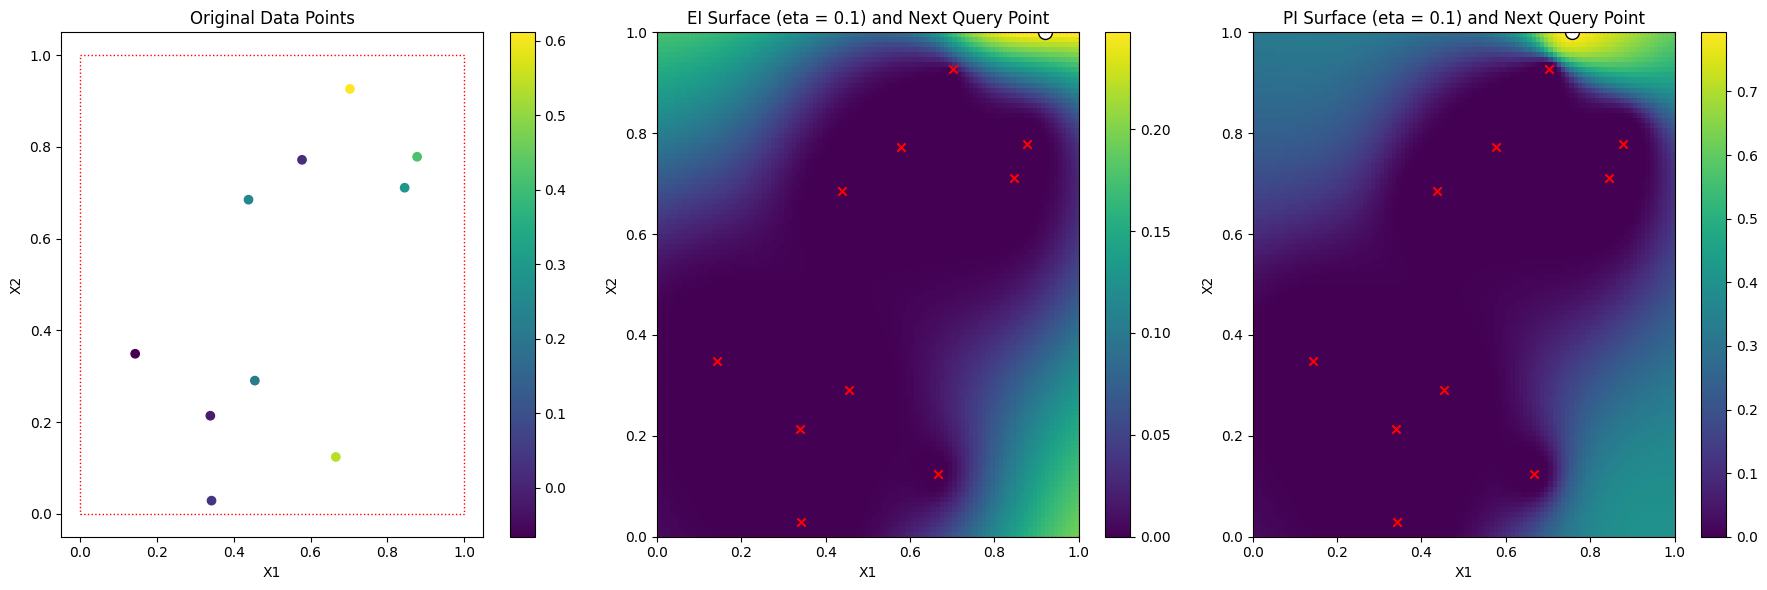

In [78]:
def visualize_gp_ei_pi(X, y, x1, x2, ei, pi, next_query_EI, next_query_PI, eta):
    """
    Visualize Gaussian Process results with EI and PI.
    
    Parameters:
    X (array): Input data points
    y (array): Output values
    x1 (array): Grid values for first dimension
    x2 (array): Grid values for second dimension
    ei (array): Expected Improvement values
    pi (array): Probability of Improvement values
    next_query_EI (array): Next query point based on EI
    next_query_PI (array): Next query point based on PI
    eta (float): Current eta value for PI
    """
    plt.figure(figsize=(18, 6))
    
    # Original data points
    plt.subplot(131)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Original Data Points')
    plt.xlabel('X1')
    plt.ylabel('X2')
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    # EI surface
    plt.subplot(132)
    ei_surface = plt.imshow(ei.reshape(len(x1), len(x2)), extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
                            origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(ei_surface)
    plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
    plt.scatter(next_query_EI[0], next_query_EI[1], c='white', marker='o', s=100, edgecolor='black')
    plt.title(f'EI Surface (eta = {eta}) and Next Query Point')
    plt.xlabel('X1')
    plt.ylabel('X2')
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    # PI surface
    plt.subplot(133)
    pi_surface = plt.imshow(pi.reshape(len(x1), len(x2)), extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
                            origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(pi_surface)
    plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
    plt.scatter(next_query_PI[0], next_query_PI[1], c='white', marker='o', s=100, edgecolor='black')
    plt.title(f'PI Surface (eta = {eta}) and Next Query Point')
    plt.xlabel('X1')
    plt.ylabel('X2')
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_grid[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_grid[idx_max]
print('Next query PI: ', next_query_PI)

visualize_gp_ei_pi(X, y, x1, x2, ei, pi, next_query_EI, next_query_PI, eta)

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB, kappa):
    plt.figure(figsize=(18, 6))
    
    # Original data points
    plt.subplot(121)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Original Data Points')
    plt.xlabel('X1')
    plt.ylabel('X2')
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    # UCB surface
    plt.subplot(122)
    ucb_reshaped = ucb.reshape(len(x2), len(x1))  # Reshape to match the grid
    ucb_surface = plt.imshow(ucb_reshaped, extent=[x1.min(), x1.max(), x2.min(), x2.max()], 
                             origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(ucb_surface)
    plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
    plt.scatter(next_query_UCB[0], next_query_UCB[1], c='white', marker='o', s=100, edgecolor='black')
    plt.title(f'UCB Surface (kappa = {kappa}) and Next Query Point')
    plt.xlabel('X1')
    plt.ylabel('X2')
    rect = plt.Rectangle((x1.min(), x2.min()), x1.max()-x1.min(), x2.max()-x2.min(), 
                         fill=False, linestyle=':', edgecolor='red')
    plt.gca().add_patch(rect)
    
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB, kappa)

NameError: name 'next_query_UCB' is not defined

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB, kappa):
    plt.figure(figsize=(18, 6))
    
    # Original data points
    plt.subplot(121)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Original Data Points')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    # UCB surface
    plt.subplot(122)
    ucb_reshaped = ucb.reshape(len(x2), len(x1))
    ucb_surface = plt.imshow(ucb_reshaped, extent=[0, 1, 0, 1], 
                             origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(ucb_surface)
    plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
    plt.scatter(next_query_UCB[0], next_query_UCB[1], c='white', marker='o', s=100, edgecolor='black')
    plt.title(f'UCB Surface (kappa = {kappa:.2f})\nRange: {ucb.min():.4f} to {ucb.max():.4f}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB, kappa)

# Debugging information
print(f"UCB shape: {ucb.shape}")
print(f"UCB range: {ucb.min():.4f} to {ucb.max():.4f}")
print(f"UCB mean: {ucb.mean():.4f}")
print(f"UCB std: {ucb.std():.4f}")

visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB)

NameError: name 'next_query_UCB' is not defined

## MLE

use the Expected Improvement (EI) and Probability of Improvement (PI) to tune the hyperparameters of your Gaussian Process model. This process is often referred to as maximum likelihood estimation (MLE) or model selection

This code does the following:

Defines the Expected Improvement (EI) and Probability of Improvement (PI) functions.

Creates an objective function that computes the negative mean of the acquisition function (EI or PI) for given hyperparameters.

Uses scipy's minimize function to find the optimal hyperparameters that maximize the acquisition function.

Optimizes hyperparameters separately for EI and PI.

Creates two Gaussian Process models, one with EI-optimized hyperparameters and another with PI-optimized hyperparameters.

## This approach allows you to tune the hyperparameters of your Gaussian Process model using both EI and PI as criteria. The resulting models should be better fitted to your data, potentially leading to improved predictions and optimization results.
Remember that the effectiveness of this method can depend on your specific dataset and problem. You might want to experiment with different initial guesses, bounds for the hyperparameters, or even different kernel functions to see what works best for your particular case.

In this code, you are optimizing two hyperparameters for the Gaussian Process Regression (GPR) model:

Length-scale (l): This is the first parameter in the optimize_hyperparameters function's initial_params and in the returned result.x. It's used in the RBF (Radial Basis Function) kernel.
Signal variance (sigma_f): This is the second parameter in initial_params and result.x. It's used in the ConstantKernel, which is multiplied with the RBF kernel.

These parameters are being optimized for both the Expected Improvement (EI) and Probability of Improvement (PI) acquisition functions separately.

The optimization process works as follows:

The optimize_hyperparameters function is called twice, once for EI and once for PI:
pythonCopyoptimal_params_ei = optimize_hyperparameters(X, y, 'EI')
optimal_params_pi = optimize_hyperparameters(X, y, 'PI')

Inside optimize_hyperparameters, the minimize function from scipy.optimize is used to find the optimal values for l and sigma_f that minimize the negative of the mean acquisition function value (either EI or PI).
The optimization is constrained by the bounds:
pythonCopybounds = [(1e-5, 1e5), (1e-5, 1e5)]
This means both l and sigma_f are constrained to be between 1e-5 and 1e5.
The optimal parameters are then used to create the final GPR models:
pythonCopykernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
Here, optimal_params_ei[0] is the optimal length-scale (l) and optimal_params_ei[1] is the optimal signal variance (sigma_f) for the EI model. The same is done for the PI model.

By optimizing these parameters, you're trying to find the kernel configuration that best fits your data while maximizing the chosen acquisition function (EI or PI). This helps in balancing the exploration-exploitation trade-off in the Bayesian optimization process.

C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\s

Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]
Optimal hyperparameters (UCB): [1. 1.]
UCB range: 0.20470786962816204 0.8743833393688535
ucb.shape (10000,)
Next query EI:  [0.78787879 0.95959596]
Next query PI:  [0.72727273 0.93939394]
Next query UCB:  [0.6969697  0.92929293]


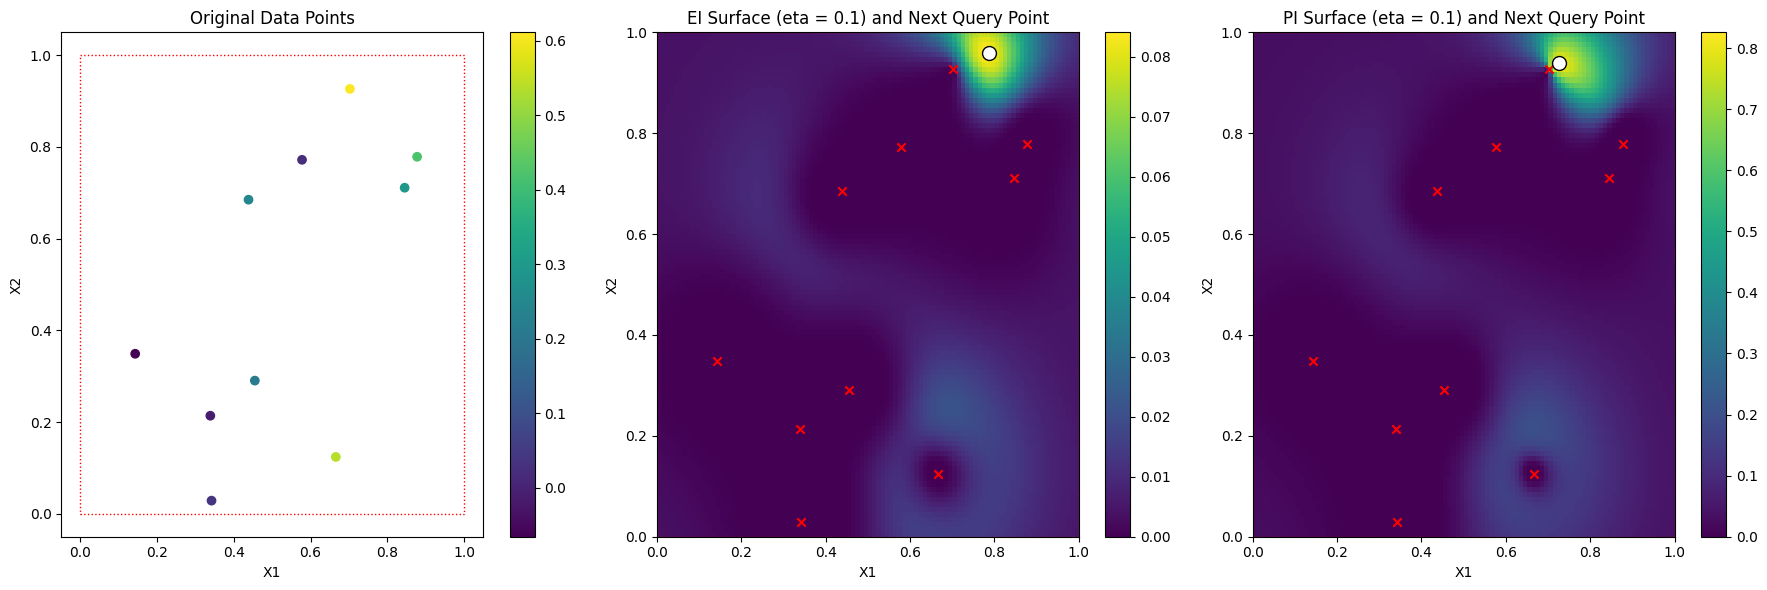

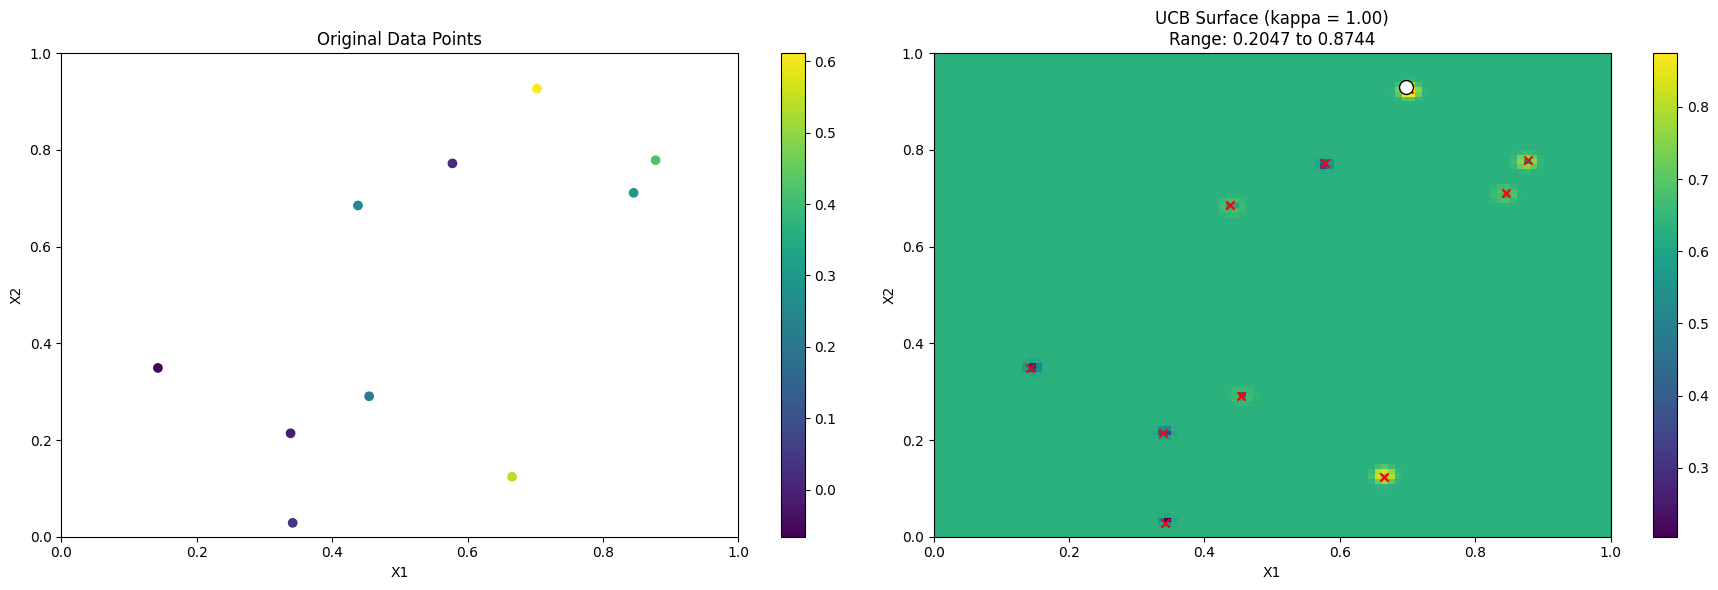

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Assuming X and y are your existing data points

# Define the acquisition functions
def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample = gpr.predict(X_sample)
    
    # mu_sample_opt = np.max(mu_sample)
    mu_sample_opt = np.max(Y_sample)
    
    
    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    
    return ei

def probability_of_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample = gpr.predict(X_sample)
    
    # mu_sample_opt = np.max(mu_sample)
    mu_sample_opt = np.max(Y_sample)
    
    with np.errstate(divide='warn'):
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
    
    return pi

def upper_confidence_bound(X, X_sample, Y_sample, gpr, kappa=1.96):
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + kappa * sigma
    return ucb


# fix seed
np.random.seed(1)

# Modify the GaussianProcessRegressor instantiations to include the random_state
def objective_function(params, X, y, acquisition_func, xi):
    l, sigma_f = params
    kernel = C(sigma_f**2) * RBF(l)
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
    gpr.fit(X, y)
    
    # Compute the acquisition function
    if acquisition_func == 'EI':
        acq = expected_improvement(X, X, y, gpr, xi)
    elif acquisition_func == 'PI':
        acq = probability_of_improvement(X, X, y, gpr, xi)
    elif acquisition_func == 'UCB':
        acq = upper_confidence_bound(X, X, y, gpr, xi)
    else:
        raise ValueError("Invalid acquisition function")
    
    # We want to maximize the acquisition function, so we return its negative
    return -np.mean(acq)

# Optimization function
def optimize_hyperparameters(X, y, acquisition_func, xi):
    # Initial guess for hyperparameters
    initial_params = [1.0, 1.0]
    
    # Bounds for l and sigma_f
    bounds = [(1e-5, 1e5), (1e-5, 1e5)]
    
    # Optimize
    result = minimize(objective_function, initial_params, args=(X, y, acquisition_func, xi),
                      bounds=bounds, method='L-BFGS-B')
    
    return result.x

# Optimize hyperparameters using EI, PI, and UCB
xi=0.1
kappa=1.0
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi)
optimal_params_ucb = optimize_hyperparameters(X, y, 'UCB', kappa)

print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)
print("Optimal hyperparameters (UCB):", optimal_params_ucb)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

kernel_ucb = C(optimal_params_ucb[1]**2) * RBF(optimal_params_ucb[0])
gpr_ucb = GaussianProcessRegressor(kernel=kernel_ucb, n_restarts_optimizer=10)
gpr_ucb.fit(X, y)

# Create a mesh grid for visualization
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_viz = np.column_stack([X1.ravel(), X2.ravel()])

# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)
mean_ucb, std_ucb = gpr_ucb.predict(X_viz, return_std=True)
# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)
ucb = upper_confidence_bound(X_viz, X, y, gpr_ucb)
print("UCB range:", ucb.min(), ucb.max())
print('ucb.shape', ucb.shape)
# Reshape for plotting
mean_ei = mean_ei.reshape(X1.shape)
std_ei = std_ei.reshape(X1.shape)
mean_pi = mean_pi.reshape(X1.shape)
std_pi = std_pi.reshape(X1.shape)
mean_ucb = mean_ucb.reshape(X1.shape)
std_ucb = std_ucb.reshape(X1.shape)
ei = ei.reshape(X1.shape)
pi = pi.reshape(X1.shape)
ucb = ucb.reshape(X1.shape)

# Find the next query points
idx_max_ei = np.argmax(ei)
next_query_EI = X_viz[idx_max_ei]
print('Next query EI: ', next_query_EI)

idx_max_pi = np.argmax(pi)
next_query_PI = X_viz[idx_max_pi]
print('Next query PI: ', next_query_PI)

idx_max_ucb = np.argmax(ucb)
next_query_UCB = X_viz[idx_max_ucb]
print('Next query UCB: ', next_query_UCB)

visualize_gp_ei_pi(X, y, x1, x2, ei, pi, next_query_EI, next_query_PI, xi)
visualize_gp_ucb(X, y, x1, x2, ucb, next_query_UCB, kappa)

In [51]:
ucb

array([[0.63207963, 0.63207963, 0.63207963, ..., 0.63207963, 0.63207963,
        0.63207963],
       [0.63207963, 0.63207963, 0.63207963, ..., 0.63207963, 0.63207963,
        0.63207963],
       [0.63207963, 0.63207963, 0.63207963, ..., 0.63207963, 0.63207963,
        0.63207963],
       ...,
       [0.63207963, 0.63207963, 0.63207963, ..., 0.63207963, 0.63207963,
        0.63207963],
       [0.63207963, 0.63207963, 0.63207963, ..., 0.63207963, 0.63207963,
        0.63207963],
       [0.63207963, 0.63207963, 0.63207963, ..., 0.63207963, 0.63207963,
        0.63207963]])

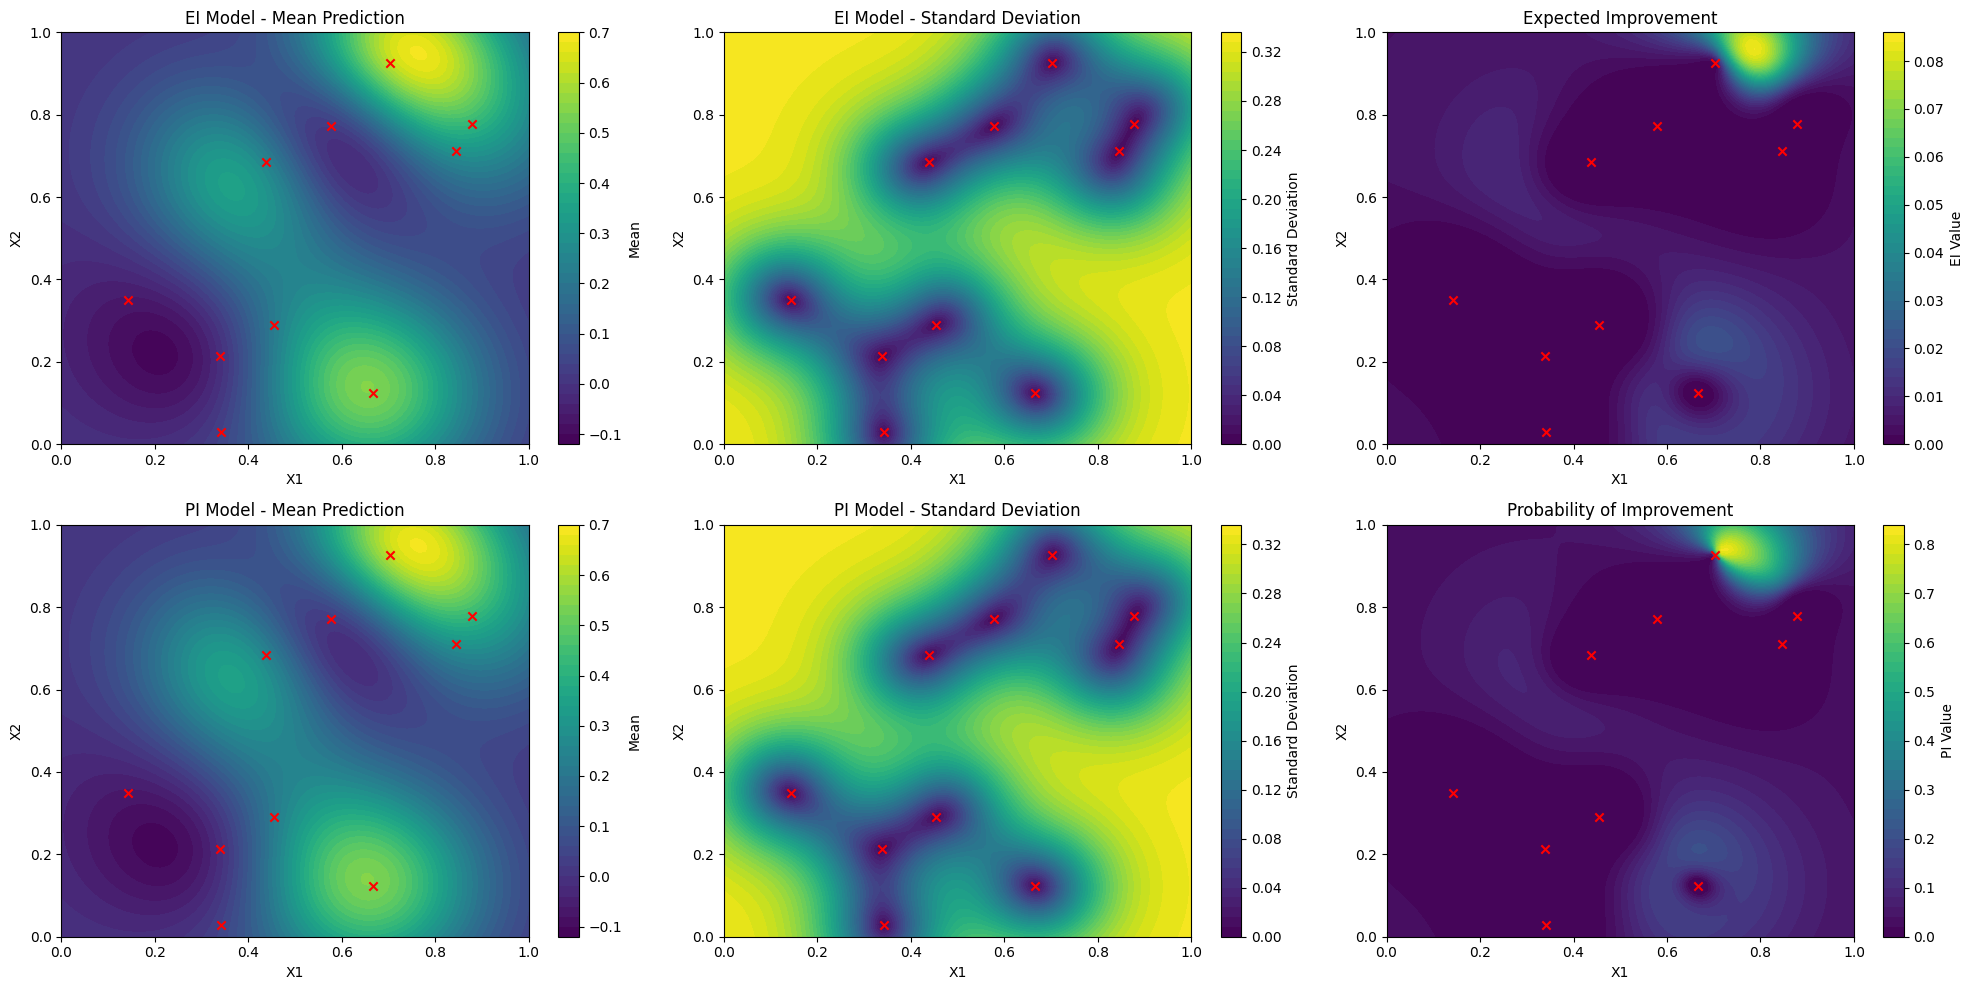

In [54]:
# Visualization or the mean and std
plt.figure(figsize=(20, 10))

# EI Model
plt.subplot(231)
plt.contourf(X1, X2, mean_ei, levels=50, cmap='viridis')
plt.colorbar(label='Mean')
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title('EI Model - Mean Prediction')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(232)
plt.contourf(X1, X2, std_ei, levels=50, cmap='viridis')
plt.colorbar(label='Standard Deviation')
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title('EI Model - Standard Deviation')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(233)
plt.contourf(X1, X2, ei, levels=50, cmap='viridis')
plt.colorbar(label='EI Value')
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title('Expected Improvement')
plt.xlabel('X1')
plt.ylabel('X2')

# PI Model
plt.subplot(234)
plt.contourf(X1, X2, mean_pi, levels=50, cmap='viridis')
plt.colorbar(label='Mean')
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title('PI Model - Mean Prediction')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(235)
plt.contourf(X1, X2, std_pi, levels=50, cmap='viridis')
plt.colorbar(label='Standard Deviation')
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title('PI Model - Standard Deviation')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(236)
plt.contourf(X1, X2, pi, levels=50, cmap='viridis')
plt.colorbar(label='PI Value')
plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')
plt.title('Probability of Improvement')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

## Function 2: conlcusion

Expected Improvement (EI) Acquisition Function.
Next query EI:  [0.78787879 0.95959596]

In [52]:
# Append next_query to X
X_updated = np.vstack((X, next_query_EI))
print(X_updated)

[[0.66579958 0.12396913]
 [0.87779099 0.7786275 ]
 [0.14269907 0.34900513]
 [0.84527543 0.71112027]
 [0.45464714 0.29045518]
 [0.57771284 0.77197318]
 [0.43816606 0.68501826]
 [0.34174959 0.02869772]
 [0.33864816 0.21386725]
 [0.70263656 0.9265642 ]
 [0.78787879 0.95959596]]


## Function 3

In [57]:
function_num = 3
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

X= (15, 3) , dimensions= 3
x 1 = [0.17152521 0.24211446 0.53490572 0.49258141] ... 
x 2 = [0.34391687 0.64407427 0.39850092 0.61159319] ... 
x 3 = [0.2487372  0.27243281 0.17338873 0.34017639] ... 
Y= (15,) = [-0.1121222  -0.08796286 -0.11141465 -0.03483531] ...


In [373]:
# Create DataFrame
import pandas as pd
df = pd.DataFrame(X, columns=['Compound 1', 'Compound 2', 'Compound 3'])
df['Adverse Reaction'] = y
print(df)
max_adverse_reaction = df['Adverse Reaction'].max()
max_row = df.loc[df['Adverse Reaction'] == max_adverse_reaction]

print(f"The maximum Adverse Reaction is: {max_adverse_reaction}")
print("\nThe row with the maximum Adverse Reaction is:")
print(max_row)

    Compound 1  Compound 2  Compound 3  Adverse Reaction
0     0.171525    0.343917    0.248737         -0.112122
1     0.242114    0.644074    0.272433         -0.087963
2     0.534906    0.398501    0.173389         -0.111415
3     0.492581    0.611593    0.340176         -0.034835
4     0.134622    0.219917    0.458206         -0.048008
5     0.345523    0.941360    0.269363         -0.110621
6     0.151837    0.439991    0.990882         -0.398926
7     0.645503    0.397143    0.919771         -0.113869
8     0.746912    0.284196    0.226300         -0.131461
9     0.170477    0.697032    0.149169         -0.094190
10    0.220549    0.297825    0.343555         -0.046947
11    0.666014    0.671985    0.246295         -0.105965
12    0.046809    0.231360    0.770618         -0.118048
13    0.600097    0.725136    0.066089         -0.036378
14    0.965995    0.861120    0.566829         -0.056758
The maximum Adverse Reaction is: -0.034835313350078584

The row with the maximum Adverse

In [375]:
# Calculate correlation matrix
corr_matrix = np.corrcoef(np.column_stack((X, y.reshape(-1, 1))).T)
print(corr_matrix)


[[ 1.          0.39392672 -0.13333433  0.25060654]
 [ 0.39392672  1.         -0.30595216  0.15843861]
 [-0.13333433 -0.30595216  1.         -0.57367612]
 [ 0.25060654  0.15843861 -0.57367612  1.        ]]


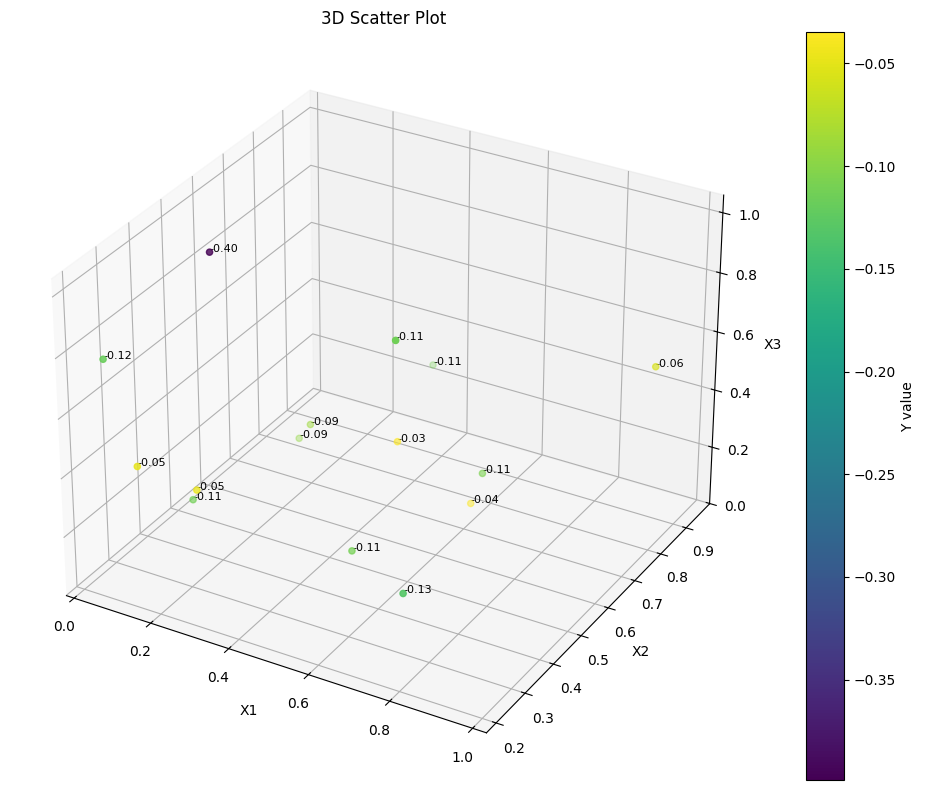

acua max so far:  -0.034835313350078584
acua max so far:  [0.49258141 0.61159319 0.34017639]


In [377]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter_with_annotations(X, y, figsize=(10, 8)):
    if X.shape[1] != 3:
        raise ValueError("This function is designed for 3-dimensional input data.")
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('3D Scatter Plot')
    
    for i, (x, y_val) in enumerate(zip(X, y)):
        ax.text(x[0], x[1], x[2], f'{y_val:.2f}', size=8, zorder=1, color='k')
    
    fig.colorbar(scatter, ax=ax, label='Y value')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming X is your 3D input data and y is your target variable
plot_3d_scatter_with_annotations(X, y)

idx_max = np.argmax(y)
sample_max = X[idx_max]
print('acua max so far: ', y[idx_max])
print('acua max so far: ', sample_max)

In [379]:
# Initialize and fit the Gaussian Process Regressor
#kernel = C(1.0, (1e-3, 1e3)) * RBF([1, 1], (1e-2, 1e2))
gpr = GaussianProcessRegressor(random_state=0)
#gpr = GaussianProcessRegressor()
gpr.fit(X, y)

# Create a grid for optimization
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x3 = np.linspace(0, 1, 100)
X1, X2, X3 = np.meshgrid(x1, x2, x3)
X_grid = np.column_stack([X1.ravel(), X2.ravel(), X3.ravel()])

# Predict mean and standard deviation
mean, std = gpr.predict(X_grid, return_std=True)

# Calculate UCB
#ucb = mean + 1.96 * std
ucb = mean + 0.5 * std
# Find the next query point
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print('Next query UCB: ', next_query)

Next query UCB:  [1.         0.         0.64646465]


# Conservative approach (more exploitation)
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.01)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.05)

# Balanced approach
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.05)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.1)

# Exploratory approach
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.1)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.15)

In [382]:

#MLE EI + PI
np.random.seed(1)

# Optimize hyperparameters using EI and PI
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.1)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.15)

print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

# Create a mesh grid for visualization
x1 = x2 = x3 = np.linspace(0, 1, 100)
X1, X2, X3 = np.meshgrid(x1, x2, x3)
X_viz = np.column_stack([X1.ravel(), X2.ravel(), X3.ravel()])

# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)

# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)

# Reshape for plotting
mean_ei = mean_ei.reshape(X1.shape)
std_ei = std_ei.reshape(X1.shape)
mean_pi = mean_pi.reshape(X1.shape)
std_pi = std_pi.reshape(X1.shape)
ei = ei.reshape(X1.shape)
pi = pi.reshape(X1.shape)


# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_viz[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_viz[idx_max]
print('Next query PI: ', next_query_PI)


Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]
Next query EI:  [0.46464646 0.11111111 0.52525253]
Next query PI:  [0.32323232 0.3030303  0.4040404 ]


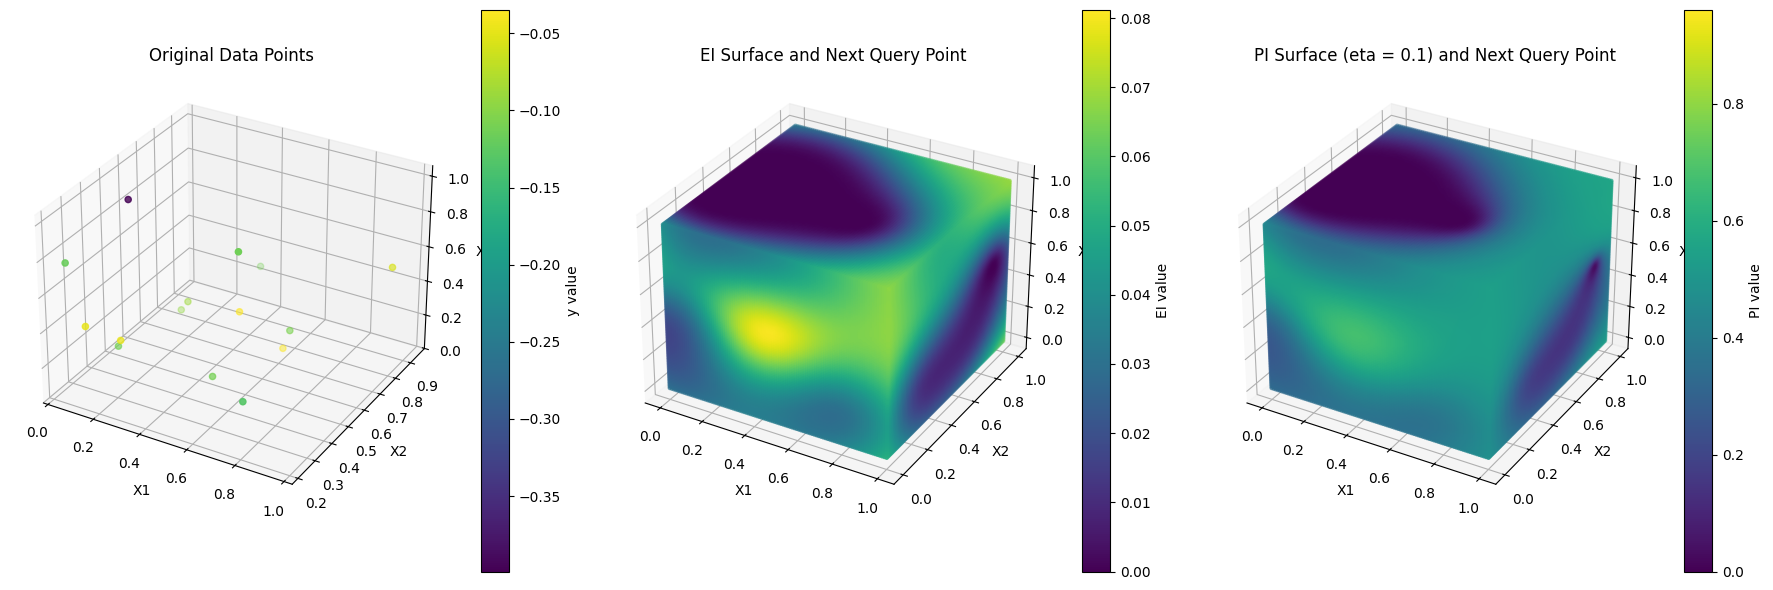

In [384]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_gp_ei_pi_3d(X, y, x1, x2, x3, ei, pi, next_query_EI, next_query_PI, eta):
    """
    Visualize Gaussian Process results with EI and PI in 3D.
    
    Parameters:
    X (array): Input data points
    y (array): Output values
    x1, x2, x3 (array): Grid values for each dimension
    ei (array): Expected Improvement values
    pi (array): Probability of Improvement values
    next_query_EI (array): Next query point based on EI
    next_query_PI (array): Next query point based on PI
    eta (float): Current eta value for PI
    """
    fig = plt.figure(figsize=(18, 6))
    
    # Original data points
    ax1 = fig.add_subplot(131, projection='3d')
    scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    fig.colorbar(scatter, ax=ax1, label='y value')
    ax1.set_title('Original Data Points')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('X3')
    
    # EI surface
    ax2 = fig.add_subplot(132, projection='3d')
    X1, X2, X3 = np.meshgrid(x1, x2, x3)
    ei_surface = ax2.scatter(X1, X2, X3, c=ei.flatten(), cmap='viridis', s=5)
    fig.colorbar(ei_surface, ax=ax2, label='EI value')
    ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c='red', marker='x')
    ax2.scatter(next_query_EI[0], next_query_EI[1], next_query_EI[2], c='white', marker='o', s=100, edgecolor='black')
    ax2.set_title('EI Surface and Next Query Point')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('X3')
    
    # PI surface
    ax3 = fig.add_subplot(133, projection='3d')
    pi_surface = ax3.scatter(X1, X2, X3, c=pi.flatten(), cmap='viridis', s=5)
    fig.colorbar(pi_surface, ax=ax3, label='PI value')
    ax3.scatter(X[:, 0], X[:, 1], X[:, 2], c='red', marker='x')
    ax3.scatter(next_query_PI[0], next_query_PI[1], next_query_PI[2], c='white', marker='o', s=100, edgecolor='black')
    ax3.set_title(f'PI Surface (eta = {eta}) and Next Query Point')
    ax3.set_xlabel('X1')
    ax3.set_ylabel('X2')
    ax3.set_zlabel('X3')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming X, y, x1, x2, x3, ei, pi, next_query_EI, next_query_PI, and eta are defined
visualize_gp_ei_pi_3d(X, y, x1, x2, x3, ei, pi, next_query_EI, next_query_PI, eta)

## Function 3: conlcusion
 Next query EI:  [0.46464646 0.11111111 0.52525253]

## Function 4

In [386]:
function_num = 4
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

X= (30, 4) , dimensions= 4
x 1 = [0.89698105 0.8893564  0.25094624 0.34696206] ... 
x 2 = [0.72562797 0.49958786 0.03369313 0.0062504 ] ... 
x 3 = [0.17540431 0.53926886 0.14538002 0.76056361] ... 
x 4 = [0.70169437 0.50878344 0.49493242 0.61302356] ... 
Y= (30,) = [-22.10828779 -14.60139663 -11.69993246 -16.05376511] ...


In [100]:
# Create DataFrame
import pandas as pd
column_names = [f'X{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)
df['y'] = y

print(df)
max_adverse_reaction = df['y'].max()
max_row = df.loc[df['y'] == max_adverse_reaction]

print(f"The maximumy is: {max_adverse_reaction}")
print("\nThe row with the y is:")
print(max_row)

          X1        X2        X3        X4          y
0   0.896981  0.725628  0.175404  0.701694 -22.108288
1   0.889356  0.499588  0.539269  0.508783 -14.601397
2   0.250946  0.033693  0.145380  0.494932 -11.699932
3   0.346962  0.006250  0.760564  0.613024 -16.053765
4   0.124871  0.129770  0.384400  0.287076 -10.069633
5   0.801303  0.500231  0.706645  0.195103 -15.487083
6   0.247708  0.060445  0.042186  0.441324 -12.681685
7   0.746702  0.757092  0.369353  0.206566 -16.026400
8   0.400665  0.072574  0.886768  0.243842 -17.049235
9   0.626071  0.586751  0.438806  0.778858 -12.741766
10  0.957135  0.597644  0.766114  0.776210 -27.316396
11  0.732812  0.145250  0.476813  0.133366 -13.527649
12  0.655115  0.072392  0.687152  0.081517 -16.679115
13  0.219734  0.832031  0.482864  0.082569 -16.507159
14  0.488594  0.211965  0.939178  0.376192 -17.817999
15  0.167130  0.876555  0.217240  0.959801 -26.561821
16  0.216911  0.166086  0.241372  0.770062 -12.758324
17  0.387488  0.804532  0.75

In [388]:
# Calculate correlation matrix
corr_matrix = np.corrcoef(np.column_stack((X, y.reshape(-1, 1))).T)
print(corr_matrix)

[[ 1.          0.24932861  0.24961977  0.19018558 -0.53988816]
 [ 0.24932861  1.         -0.08004773  0.18799856 -0.48480871]
 [ 0.24961977 -0.08004773  1.         -0.15471009 -0.08479379]
 [ 0.19018558  0.18799856 -0.15471009  1.         -0.53211541]
 [-0.53988816 -0.48480871 -0.08479379 -0.53211541  1.        ]]


Shape of X_viz: (10000, 4)


In [392]:

#MLE EI + PI
np.random.seed(1)

# Optimize hyperparameters using EI and PI
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.1)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.15)

print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

# Create a mesh grid for visualization
#x1 = x2 = x3 = x4 = np.linspace(0, 1, 40)
#X1, X2, X3 , X4 = np.meshgrid(x1, x2, x3,  x4)
#X_viz = np.column_stack([X1.ravel(), X2.ravel(), X3.ravel(), X4.ravel()])
X_viz = create_n_dimensional_meshgrid(n_dimensions=4, num_points=30, start=0, end=1)


# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)

# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)
'''
# Reshape for plotting
mean_ei = mean_ei.reshape(X1.shape)
std_ei = std_ei.reshape(X1.shape)
mean_pi = mean_pi.reshape(X1.shape)
std_pi = std_pi.reshape(X1.shape)
ei = ei.reshape(X1.shape)
pi = pi.reshape(X1.shape)
'''

# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_viz[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_viz[idx_max]
print('Next query PI: ', next_query_PI)


C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\s

Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]
Next query EI:  [0.4137931  0.37931034 0.37931034 0.4137931 ]
Next query PI:  [0.51724138 0.37931034 0.37931034 0.31034483]


In [132]:
print(X_viz)
X1.shape

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.11111111]
 [0.         0.         0.         0.22222222]
 ...
 [1.         1.         1.         0.77777778]
 [1.         1.         1.         0.88888889]
 [1.         1.         1.         1.        ]]


(4,)

# Function 4: conlcusion
Next query EI:  [0.43589744 0.38461538 0.35897436 0.41025641]

# Function 5: 

In [395]:
function_num = 5
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

# Create DataFrame
import pandas as pd
column_names = [f'X{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)
df['y'] = y

print(df)
max_adverse_reaction = df['y'].max()
max_row = df.loc[df['y'] == max_adverse_reaction]

print(f"The maximumy is: {max_adverse_reaction}")
print("\nThe row with the y is:")
print(max_row)

X= (20, 4) , dimensions= 4
x 1 = [0.19144708 0.75865295 0.43834987 0.70605083] ... 
x 2 = [0.03819337 0.53651774 0.8043397  0.53419196] ... 
x 3 = [0.60741781 0.65600038 0.21024527 0.26424335] ... 
x 4 = [0.41458414 0.36034155 0.15129482 0.48208755] ... 
Y= (20,) = [64.44343986 18.3013796   0.1129398   4.21089813] ...
          X1        X2        X3        X4            y
0   0.191447  0.038193  0.607418  0.414584    64.443440
1   0.758653  0.536518  0.656000  0.360342    18.301380
2   0.438350  0.804340  0.210245  0.151295     0.112940
3   0.706051  0.534192  0.264243  0.482088     4.210898
4   0.836478  0.193610  0.663893  0.785649   258.370525
5   0.683432  0.118663  0.829046  0.567577    78.434389
6   0.553621  0.667350  0.323806  0.814870    57.571537
7   0.352356  0.322242  0.116979  0.473113   109.571876
8   0.153786  0.729382  0.422598  0.443074     8.847992
9   0.463442  0.630025  0.107906  0.957644   233.223610
10  0.677491  0.358510  0.479592  0.072880    24.423088
11  0.58

In [397]:

#MLE EI + PI
np.random.seed(1)

# Optimize hyperparameters using EI and PI
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.1)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.15)


print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

X_viz = create_n_dimensional_meshgrid(n_dimensions=4, num_points=30, start=0, end=1)

# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)

# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)

# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_viz[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_viz[idx_max]
print('Next query PI: ', next_query_PI)


C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\s

Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]


C:\Users\claud\anaconda3\envs\ImpCF\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Next query EI:  [0.24137931 0.86206897 0.89655172 0.86206897]
Next query PI:  [0.24137931 0.82758621 0.93103448 0.89655172]


# Function 5: conlcusion
Next query EI:  [0.24137931 0.86206897 0.89655172 0.86206897]

# Function 6: 

In [87]:
function_num = 6
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

# Create DataFrame
import pandas as pd
column_names = [f'X{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)
df['y'] = y

print(df)
max_adverse_reaction = df['y'].max()
max_row = df.loc[df['y'] == max_adverse_reaction]

print(f"The maximumy is: {max_adverse_reaction}")
print("\nThe row with the max y is:")
print(max_row)

X= (20, 5) , dimensions= 5
x 1 = [0.7281861  0.24238435 0.72952261 0.77062024] ... 
x 2 = [0.15469257 0.84409997 0.7481062  0.11440374] ... 
x 3 = [0.73255167 0.5778091  0.67977464 0.04677993] ... 
x 4 = [0.69399651 0.67902128 0.35655228 0.64832428] ... 
x 5 = [0.05640131 0.50195289 0.67105368 0.27354905] ... 
Y= (20,) = [-0.71426495 -1.20995524 -1.67219994 -1.53605771] ...
          X1        X2        X3        X4        X5         y
0   0.728186  0.154693  0.732552  0.693997  0.056401 -0.714265
1   0.242384  0.844100  0.577809  0.679021  0.501953 -1.209955
2   0.729523  0.748106  0.679775  0.356552  0.671054 -1.672200
3   0.770620  0.114404  0.046780  0.648324  0.273549 -1.536058
4   0.618812  0.331802  0.187288  0.756238  0.328835 -0.829237
5   0.784958  0.910682  0.708120  0.959225  0.004911 -1.247049
6   0.145111  0.896685  0.896322  0.726272  0.236272 -1.233786
7   0.945069  0.288459  0.978806  0.961656  0.598016 -1.694343
8   0.125720  0.862725  0.028544  0.246605  0.751206 -2.

In [89]:

#MLE EI + PI
np.random.seed(1)

# Optimize hyperparameters using EI and PI
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.1)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.15)


print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

X_viz = create_n_dimensional_meshgrid(n_dimensions=5, num_points=20, start=0, end=1)

# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)

# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)

# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_viz[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_viz[idx_max]
print('Next query PI: ', next_query_PI)


Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]
Next query EI:  [0.         0.15789474 0.10526316 1.         0.        ]
Next query PI:  [0.47368421 0.42105263 0.31578947 0.84210526 0.26315789]


# Function 6: conlcusion
Next query PI:  [0.47368421 0.42105263 0.31578947 0.84210526 0.26315789]v

# Funtion 7

In [61]:
function_num = 7
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

# Create DataFrame
import pandas as pd
column_names = [f'X{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)
df['y'] = y

print(df)
max_adverse_reaction = df['y'].max()
max_row = df.loc[df['y'] == max_adverse_reaction]

print(f"The maximumy is: {max_adverse_reaction}")
print("\nThe row with the max y is:")
print(max_row)



X= (30, 6) , dimensions= 6
x 1 = [0.27262382 0.54300258 0.09083225 0.11886697] ... 
x 2 = [0.32449536 0.9246939  0.66152938 0.61505494] ... 
x 3 = [0.89710881 0.34156746 0.06593091 0.90581639] ... 
x 4 = [0.83295115 0.64648585 0.25857701 0.8553003 ] ... 
x 5 = [0.15406269 0.71844033 0.96345285 0.41363143] ... 
x 6 = [0.79586362 0.34313266 0.6402654  0.58523563] ... 
Y= (30,) = [0.6044327  0.56275307 0.00750324 0.0614243 ] ...
          X1        X2        X3        X4        X5        X6         y
0   0.272624  0.324495  0.897109  0.832951  0.154063  0.795864  0.604433
1   0.543003  0.924694  0.341567  0.646486  0.718440  0.343133  0.562753
2   0.090832  0.661529  0.065931  0.258577  0.963453  0.640265  0.007503
3   0.118867  0.615055  0.905816  0.855300  0.413631  0.585236  0.061424
4   0.630218  0.838097  0.680013  0.731895  0.526737  0.348429  0.273047
5   0.764919  0.255883  0.609084  0.218079  0.322943  0.095794  0.083747
6   0.057896  0.491672  0.247422  0.218118  0.420428  0.730

In [63]:
# Calculate correlation matrix
corr_matrix = np.corrcoef(np.column_stack((X, y.reshape(-1, 1))).T)
print(corr_matrix)


[[ 1.         -0.08782001 -0.21973465 -0.16480353 -0.03756501 -0.44449865
  -0.34322356]
 [-0.08782001  1.         -0.05766158  0.15931803  0.32065569  0.19946003
   0.0481853 ]
 [-0.21973465 -0.05766158  1.          0.21643945 -0.30348336  0.07783167
   0.17730816]
 [-0.16480353  0.15931803  0.21643945  1.          0.06188247  0.06372616
  -0.07598357]
 [-0.03756501  0.32065569 -0.30348336  0.06188247  1.          0.10569023
  -0.37793229]
 [-0.44449865  0.19946003  0.07783167  0.06372616  0.10569023  1.
   0.30725566]
 [-0.34322356  0.0481853   0.17730816 -0.07598357 -0.37793229  0.30725566
   1.        ]]


In [65]:

#MLE EI + PI
np.random.seed(1)

# Optimize hyperparameters using EI and PI
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.1)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.15)


print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

X_viz = create_n_dimensional_meshgrid(n_dimensions=6, num_points=10, start=0, end=1)

# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)

# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)

# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_viz[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_viz[idx_max]
print('Next query PI: ', next_query_PI)


Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]
Next query EI:  [0.         0.44444444 0.33333333 0.11111111 0.33333333 0.77777778]
Next query PI:  [0.         0.44444444 0.33333333 0.22222222 0.44444444 0.77777778]


# Function 7 :Conclusions
Next query EI:  [0.         0.44444444 0.33333333 0.11111111 0.33333333 0.77777778]

# Function 8 

In [125]:
function_num = 8
def load_data(i):
    X = np.load('initial_data/function_' + str(i) +'/initial_inputs.npy')
    y = np.load('initial_data/function_' + str(i) +'/initial_outputs.npy')
    return X,y

X, y = load_data(function_num)
dimension = np.shape(X)[1] 
print("X=", X.shape, ", dimensions=", dimension)
for i in range(dimension):
    print("x", str(i+1), "=", X[:,i][:4], "... ")
print("Y=", y.shape, "=", y[:4], "...")

# Create DataFrame
import pandas as pd
column_names = [f'X{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=column_names)
df['y'] = y

print(df)
max_adverse_reaction = df['y'].max()
max_row = df.loc[df['y'] == max_adverse_reaction]

print(f"The maximumy is: {max_adverse_reaction}")
print("\nThe row with the max y is:")
print(max_row)


X= (40, 8) , dimensions= 8
x 1 = [0.60499445 0.17800696 0.00907698 0.50602816] ... 
x 2 = [0.29221502 0.56622265 0.81162615 0.65373012] ... 
x 3 = [0.90845275 0.99486184 0.52052036 0.36341078] ... 
x 4 = [0.35550624 0.21032501 0.07568668 0.17798105] ... 
x 5 = [0.20166872 0.32015266 0.26511183 0.0937283 ] ... 
x 6 = [0.57533801 0.70790879 0.09165169 0.19742533] ... 
x 7 = [0.31031095 0.63538449 0.59241515 0.7558269 ] ... 
x 8 = [0.73428138 0.10713163 0.36732026 0.29247234] ... 
Y= (40,) = [7.3987211  7.00522736 8.45948162 8.28400781] ...
          X1        X2        X3        X4        X5        X6        X7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   


In [131]:

#MLE EI + PI
np.random.seed(1)

# Conservative approach (more exploitation)
optimal_params_ei = optimize_hyperparameters(X, y, 'EI', xi=0.01)
optimal_params_pi = optimize_hyperparameters(X, y, 'PI', xi=0.05)

print("Optimal hyperparameters (EI):", optimal_params_ei)
print("Optimal hyperparameters (PI):", optimal_params_pi)

# When creating and fitting GPR models with optimized hyperparameters
kernel_ei = C(optimal_params_ei[1]**2) * RBF(optimal_params_ei[0])
gpr_ei = GaussianProcessRegressor(kernel=kernel_ei, n_restarts_optimizer=10)
gpr_ei.fit(X, y)

kernel_pi = C(optimal_params_pi[1]**2) * RBF(optimal_params_pi[0])
gpr_pi = GaussianProcessRegressor(kernel=kernel_pi, n_restarts_optimizer=10)
gpr_pi.fit(X, y)

#X_viz = create_n_dimensional_meshgrid(n_dimensions=8, num_points=5, start=0, end=1)
initial_point = [0.056447 , 0.065956 , 0.022929 , 0.038786 , 0.403935 , 0.801055 , 0.488307  , 0.8930854]  # Example initial point
buffer = 0.05
X_viz = create_n_dimensional_meshgrid_v2(initial_point, buffer,num_points=5)
print(f"Shape of X_viz: {X_viz.shape}")
print(f"Range for each dimension:")
for i in range(len(initial_point)):
    print(f"Dimension {i+1}: {X_viz[:, i].min():.2f} to {X_viz[:, i].max():.2f}")

# Predict using both models
mean_ei, std_ei = gpr_ei.predict(X_viz, return_std=True)
mean_pi, std_pi = gpr_pi.predict(X_viz, return_std=True)

# Calculate acquisition functions
ei = expected_improvement(X_viz, X, y, gpr_ei)
pi = probability_of_improvement(X_viz, X, y, gpr_pi)

# Find the next query point (using EI in this case)
idx_max = np.argmax(ei)
next_query_EI = X_viz[idx_max]
print('Next query EI: ', next_query_EI)

idx_max = np.argmax(pi)
next_query_PI = X_viz[idx_max]
print('Next query PI: ', next_query_PI)

print(f"The maximumy is: {max_adverse_reaction}")
print("\nThe row with the max y is:")
print(max_row)

Optimal hyperparameters (EI): [1. 1.]
Optimal hyperparameters (PI): [1. 1.]
Shape of X_viz: (390625, 8)
Range for each dimension:
Dimension 1: 0.01 to 0.11
Dimension 2: 0.02 to 0.12
Dimension 3: 0.00 to 0.07
Dimension 4: 0.00 to 0.09
Dimension 5: 0.35 to 0.45
Dimension 6: 0.75 to 0.85
Dimension 7: 0.44 to 0.54
Dimension 8: 0.84 to 0.94
Next query EI:  [0.106447  0.115956  0.072929  0.088786  0.453935  0.751055  0.438307
 0.8430854]
Next query PI:  [0.081447  0.115956  0.072929  0.0665895 0.428935  0.751055  0.463307
 0.8680854]
The maximumy is: 9.598482002566342

The row with the max y is:
          X1        X2        X3        X4        X5        X6        X7  \
14  0.056447  0.065956  0.022929  0.038786  0.403935  0.801055  0.488307   

          X8         y  
14  0.893085  9.598482  


In [66]:
initial_point = [0.056447 , 0.065956 , 0.022929 , 0.038786 , 0.403935 , 0.801055 , 0.488307  , 0.8930854]  # Example initial point
buffer = 0.05
X_viz = create_n_dimensional_meshgrid_v2(initial_point, buffer,num_points=5)
print(f"Shape of X_viz: {X_viz.shape}")
print(f"Range for each dimension:")
for i in range(len(initial_point)):
    print(f"Dimension {i+1}: {X_viz[:, i].min():.2f} to {X_viz[:, i].max():.2f}")

Shape of X_viz: (390625, 8)
Range for each dimension:
Dimension 1: 0.01 to 0.11
Dimension 2: 0.02 to 0.12
Dimension 3: 0.00 to 0.07
Dimension 4: 0.00 to 0.09
Dimension 5: 0.35 to 0.45
Dimension 6: 0.75 to 0.85
Dimension 7: 0.44 to 0.54
Dimension 8: 0.84 to 0.94


# Function 8 :Conclusions
Next query PI:  [0.081447  0.115956  0.072929  0.0665895 0.428935  0.751055  0.463307
 0.8680854]